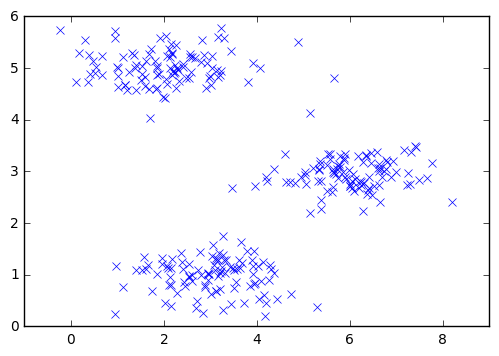

In [51]:
%matplotlib inline
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import tensorflow as tf

mat = scipy.io.loadmat('ex7data2.mat')
plt.plot(mat['X'][:, 0:1], mat['X'][:, 1:2], 'x')


npX = np.array(mat['X'])

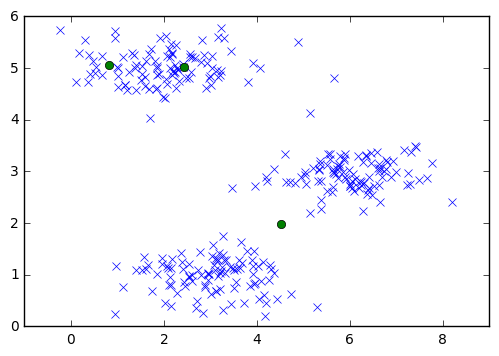

In [52]:
def unsorted_segment_mean(data, segment_ids, depth):
    summed = tf.unsorted_segment_sum(data, segment_ids, depth)
    counts = tf.reshape(tf.reduce_sum(tf.one_hot(segment_ids, depth, dtype=tf.float64), 0), (depth, 1))
    return summed / counts

def plot_centroids(centroids):
    plt.plot(centroids[:, 0:1], centroids[:, 1:2], 'o')

def kmeans(k, X):
    centroids = tf.Variable(tf.slice(tf.random_shuffle(X), [0, 0], [k, -1]))
    distances_to_centroids = tf.transpose(tf.reduce_sum((X - tf.expand_dims(centroids, 1)) ** 2, 2))
    centroid_assignments = tf.argmin(distances_to_centroids, 1)
    move_centroids = tf.assign(centroids, unsorted_segment_mean(X, centroid_assignments, k))

    init = tf.initialize_all_variables()
    sess = tf.Session()
    sess.run(init)
    for i in range(2):
        sess.run(move_centroids)
    return sess.run(centroids), sess.run(centroid_assignments);

k = 3
X = tf.constant(npX)
plt.plot(mat['X'][:, 0:1], mat['X'][:, 1:2], 'x')
plot_centroids(kmeans(k, X)[0])

In [53]:
image = scipy.io.loadmat('bird_small.mat')

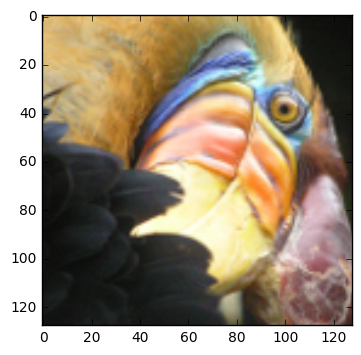

In [54]:
plt.imshow(np.array(image['A']))

In [67]:
m = 128 * 128
X = tf.constant(np.array(image['A']).reshape((m, 3)), dtype=tf.float64)
k = 16

centroids, assignments = kmeans(k, X)

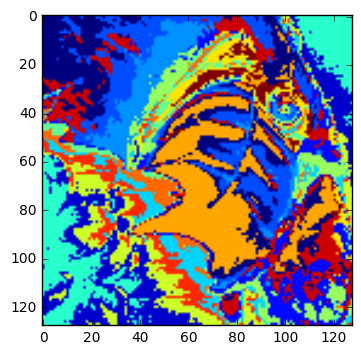

In [71]:
# Reconstruct the image
centroids
plt.imshow(assignments.reshape((128, 128)))

In [57]:
assignments[-128:-1]

array([ 2, 14,  2,  2,  2,  2, 14, 14, 14, 14,  2, 14, 14, 14, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 14, 11, 11, 11, 11, 11, 14, 14,
       14, 11, 11, 14, 14, 14, 14, 14, 14, 11, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11,  8,  8,  8,  8,  7,  7,  3,  3,  3,  3,  7,  8, 11, 11,
       11, 11, 11, 11, 11,  8,  8,  7,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3, 10, 10, 10, 10,  0, 10, 10, 10, 10, 10, 10, 10, 10,  3,
        3,  3, 10,  3,  3,  7,  8,  8])

In [58]:
np.array(centroids)[np.array(assignments)].reshape(128, 128, 3)[-1][-128:-1]

array([[  15.61510353,   17.0365408 ,   14.52862363],
       [  21.53750815,   23.30071755,   20.55642531],
       [  15.61510353,   17.0365408 ,   14.52862363],
       [  15.61510353,   17.0365408 ,   14.52862363],
       [  15.61510353,   17.0365408 ,   14.52862363],
       [  15.61510353,   17.0365408 ,   14.52862363],
       [  21.53750815,   23.30071755,   20.55642531],
       [  21.53750815,   23.30071755,   20.55642531],
       [  21.53750815,   23.30071755,   20.55642531],
       [  21.53750815,   23.30071755,   20.55642531],
       [  15.61510353,   17.0365408 ,   14.52862363],
       [  21.53750815,   23.30071755,   20.55642531],
       [  21.53750815,   23.30071755,   20.55642531],
       [  21.53750815,   23.30071755,   20.55642531],
       [  29.40192644,   31.61996497,   29.12872154],
       [  29.40192644,   31.61996497,   29.12872154],
       [  29.40192644,   31.61996497,   29.12872154],
       [  29.40192644,   31.61996497,   29.12872154],
       [  29.40192644,   31.

In [59]:
centroids

array([[ 159.25360231,  159.46589817,  172.20365034],
       [ 207.97819623,  143.9444995 ,   65.24281467],
       [  15.61510353,   17.0365408 ,   14.52862363],
       [ 106.43897638,   89.40354331,   79.04527559],
       [ 247.44548287,  200.62616822,  168.33333333],
       [ 244.17006803,  229.24353741,  159.86938776],
       [ 242.31914894,  171.79432624,  138.12056738],
       [  67.47439353,   59.82479784,   56.48966757],
       [  41.46176186,   42.4143272 ,   40.69215876],
       [ 249.61941112,  244.2606325 ,  211.31515812],
       [ 153.86095718,  121.95062972,   83.94105793],
       [  29.40192644,   31.61996497,   29.12872154],
       [ 205.3555    ,  174.5335    ,  115.0665    ],
       [ 218.56418919,  200.58952703,  198.01351351],
       [  21.53750815,   23.30071755,   20.55642531],
       [ 241.02725367,  184.82389937,  104.87002096]])

In [60]:
np.array(image['A'])[-1][-128:-1]

array([[ 15,  19,  19],
       [ 20,  20,  18],
       [ 18,  19,  17],
       [ 18,  20,  15],
       [ 17,  19,  18],
       [ 17,  17,  16],
       [ 19,  20,  19],
       [ 20,  19,  18],
       [ 20,  20,  20],
       [ 18,  20,  20],
       [ 17,  20,  18],
       [ 19,  23,  19],
       [ 18,  24,  21],
       [ 23,  25,  27],
       [ 27,  27,  28],
       [ 22,  27,  29],
       [ 26,  29,  27],
       [ 26,  31,  27],
       [ 26,  31,  30],
       [ 28,  32,  32],
       [ 31,  35,  30],
       [ 28,  33,  28],
       [ 31,  34,  39],
       [ 29,  30,  33],
       [ 30,  26,  30],
       [ 25,  27,  27],
       [ 22,  27,  25],
       [ 32,  30,  28],
       [ 37,  36,  34],
       [ 29,  32,  33],
       [ 30,  30,  33],
       [ 29,  30,  30],
       [ 23,  29,  25],
       [ 23,  26,  20],
       [ 24,  26,  22],
       [ 27,  30,  29],
       [ 26,  29,  28],
       [ 21,  23,  24],
       [ 19,  23,  20],
       [ 18,  23,  23],
       [ 19,  23,  21],
       [ 22,  24

In [61]:
import matplotlib.image as mpimg
img=mpimg.imread('bird_small.png')

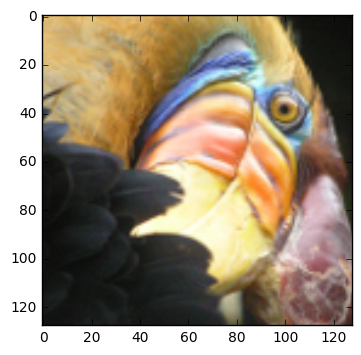

In [62]:
plt.imshow(img)